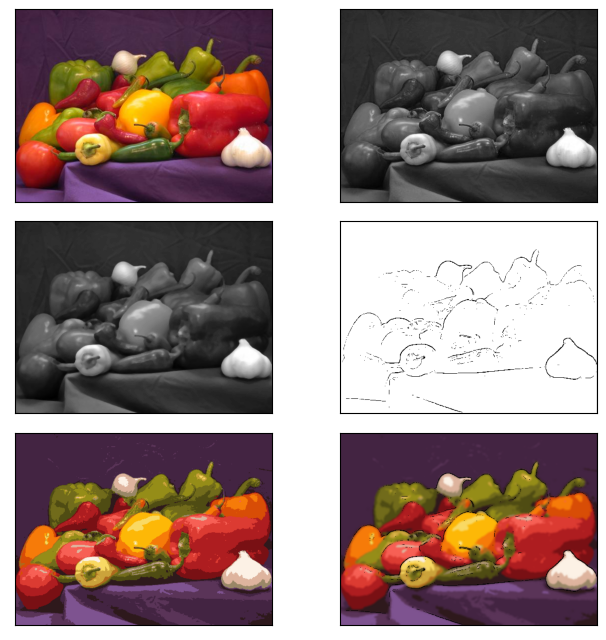

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_12808\1317798826.py", line 23, in upload
    cartoonify(imagepath)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_12808\1317798826.py", line 29, in cartoonify
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [1]:

import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path

import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
from turtle import color

top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

def upload():
    imagepath=easygui.fileopenbox()
    cartoonify(imagepath)


def cartoonify(imagepath):
    # read the image
    img=cv2.imread(imagepath)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    # confirm that image is chosen
    if img is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

   
    #converting an image to grayscale
    gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    

    #applying median blur to smoothen an image
    smooth = cv2.medianBlur(gray, 5) #blur value
    

    #retrieving the edges for cartoon effect
    #by using thresholding technique
    edge = cv2.adaptiveThreshold(smooth, 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 3, 5)#line_wdt and blur

   
    data=np.float32(img).reshape((-1,3))
    criteria=(cv2.TermCriteria_EPS +cv2.TERM_CRITERIA_MAX_ITER,20,.001)
    ret,label,center=cv2.kmeans(data,20,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS) #total color value
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
   
    
    smoothen=cv2.bilateralFilter(result,d=7,sigmaColor=200,sigmaSpace=200)
    cartoon=cv2.bitwise_and(smoothen,smoothen,mask=edge)
    

    # Plotting the whole transition
    images=[img, gray, smooth, edge, result, cartoon]

    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    save1=Button(top,text="Save cartoon image",command=lambda: save(cartoon, imagepath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()
    
    
def save(cartoon, imagepath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(imagepath)
    extension=os.path.splitext(imagepath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tsk.messagebox.showinfo(title=None, message=I)

upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()

